In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def graph_to_adj_matrix(graph):
    A = nx.to_numpy_matrix(graph)
    A = A.astype(np.int64)
    return A

def adj_matrix_to_list(adj_mat):
    ''' Convert an adjacency matrix (numpy 2d array) to list of important values '''
    n = adj_mat.shape[0] - 1
    adj_list = []
    
    for i in range(n):
        adj_list += adj_mat[i,i+1:].A1.tolist()

    return adj_list

def graph_to_adj_list(graph):
    A = graph_to_adj_matrix(graph)
    return adj_matrix_to_list(A)

def adj_list_to_matrix(adj_list):
    li_of_li = []
    n = int((-1 + (1 + 8*len(adj_list))**.5)/2)
    A = np.zeros((n+1, n+1), int)

    j = n
    i = 0
    m = 0

    while m < n:
        A[m,m+1:] = adj_list[i:j]
        i = j
        j = i + n - (m + 1)
        m += 1

    A = A + A.T

    return A

def adj_list_to_graph(adj_list):
    A = adj_list_to_matrix(adj_list)
    return nx.convert_matrix.from_numpy_matrix(A)

def adj_matrix_to_graph(adj_mat):
    return nx.convert_matrix.from_numpy_matrix(adj_mat)

### Generate a new graph and plot

In [10]:
G = nx.gnm_random_graph(12, 20)
pos = nx.spring_layout(G)

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

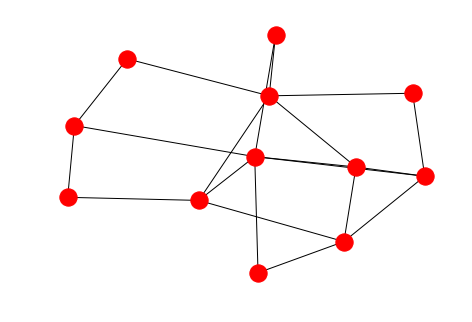

In [11]:
nx.draw(G, pos=pos)
plt.show()

### Convert graph adjacency matrix to list and back again, and plot in same layout

In [12]:
a_list = graph_to_adj_list(G)
len(A)

NameError: name 'A' is not defined

In [13]:
B = adj_list_to_graph(a_list)
B.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

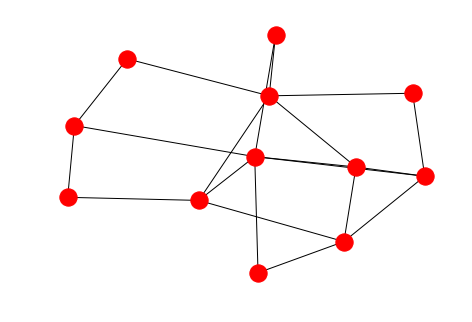

In [14]:
nx.draw(B, pos=pos)
plt.show()

### Create new graph with randomly modified edges

In [15]:
from random import sample
# Function to create new graph with randomly modified edges
def mutate_graph(G, n_mut):
    a_list = graph_to_adj_list(G)
    
    rs = sample(range(len(a_list)), n_mut)
    for r in rs:
        a_list[r] ^= 1
    
    B = adj_list_to_matrix(a_list)
    H = nx.convert_matrix.from_numpy_matrix(B)
    
    return H
# Convert to list, randomly select list value and change it, convert to matrix

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

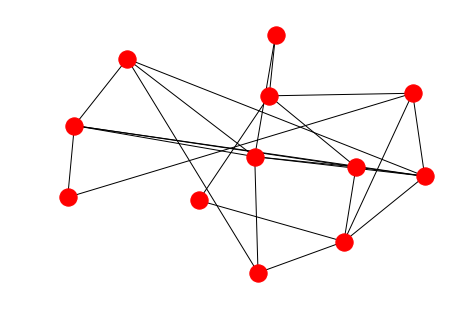

In [16]:
H = mutate_graph(G, 10)
nx.draw(H, pos=pos)
plt.show()

0.29454545454545455


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

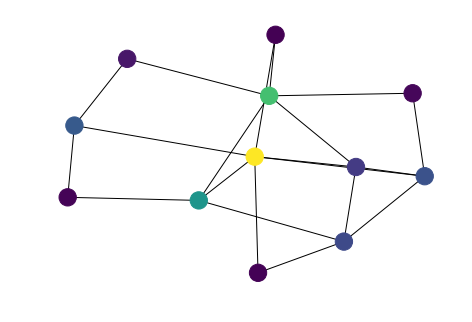

In [17]:
H = mutate_graph(G, 0)
c_b = list(nx.betweenness_centrality(H).values())
print(max(c_b) - min(c_b))

nx.draw(H, pos=pos, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

### Calculate cost of new graph

In [3]:
def new_cost(n_list, p_list):
    S = np.bitwise_xor(adj_list_to_matrix(n_list), adj_list_to_matrix(p_list))
    cost = S.sum()/2
    
    return cost

def plot_diff(N, P):
    S = np.bitwise_xor(graph_to_adj_matrix(N), graph_to_adj_matrix(P))
    nx.draw(adj_matrix_to_graph(S), pos=pr_pos, node_size=100)
    plt.show()

### Calculate Resilience

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

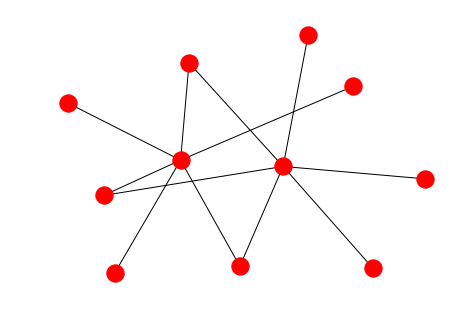

In [19]:
test_adj_list = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
test_adj_mat = adj_list_to_matrix(test_adj_list)
T = nx.convert_matrix.from_numpy_matrix(test_adj_mat)

# T = nx.gnm_random_graph(10, 20)
t_pos = nx.spring_layout(T)

nx.draw(T, pos=t_pos)
plt.show()

[0.0, 0.0, 0.0, 0.5666666666666667, 0.11851851851851852, 0.11851851851851852, 0.11851851851851852, 0.5666666666666667, 0.0, 0.0, 0.0]
0.5666666666666667


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

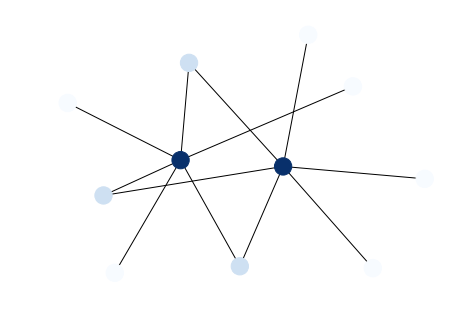

In [20]:
# c_e = list(nx.eigenvector_centrality(T).values())
# c_d = list(nx.degree_centrality(T).values())
c_b = list(nx.betweenness_centrality(T).values())
# c_c = list(nx.closeness_centrality(T).values())
# c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]

# print(c_d)
print(c_b)
print(max(c_b) - min(c_b))
# print(c_c)

nx.draw(T, pos=t_pos, node_color=c_b, cmap=plt.cm.Blues)
plt.show()

### Import Puerto Rico Power Grid Network

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

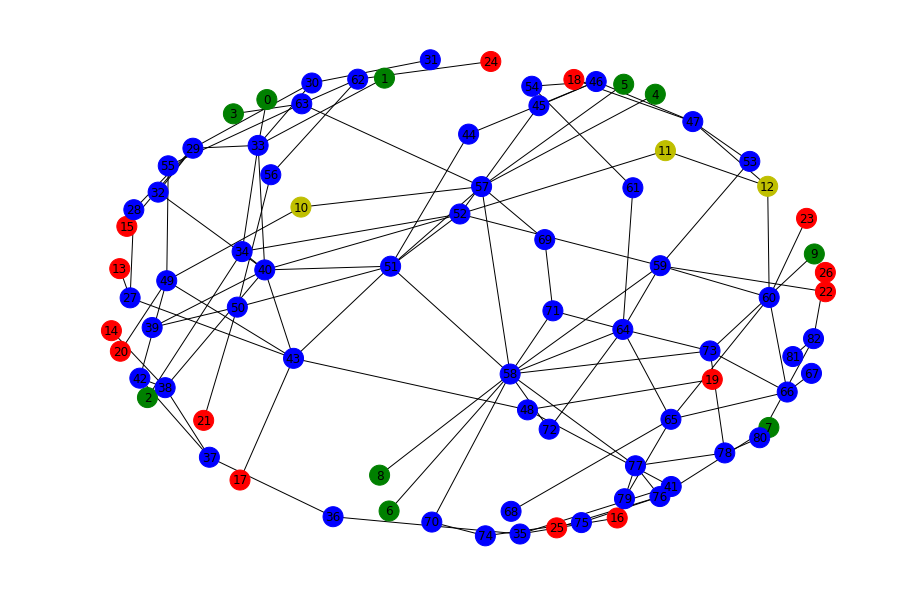

In [6]:
# generation_plants = {'Costa Sur':, 'EcoElectrica', 'Aguirre 1', 'Aguirre 2', 'Cambalache', 'Palo Seco Plant', 'San Juan 1 Plant', 'San Juan 2 Plant', 'Guayama Plant', 'Mayaguez Plant'}
import pickle
file = open('pr_pos.obj', 'rb')
pr_pos = pickle.load(file)


pr_adj = np.genfromtxt('data/pr_power_grid.csv', delimiter=',')
P = nx.convert_matrix.from_numpy_matrix(pr_adj)

# pr_pos = nx.spring_layout(P)
pr_colors = ['g']*10 + ['y']*3 + ['r']*14 + ['b']*56


nx.draw(P, pos=pr_pos, node_size=400, node_color=pr_colors, with_labels=True)
plt.savefig('pr_type.png')
plt.show()


0.4205273798769734


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

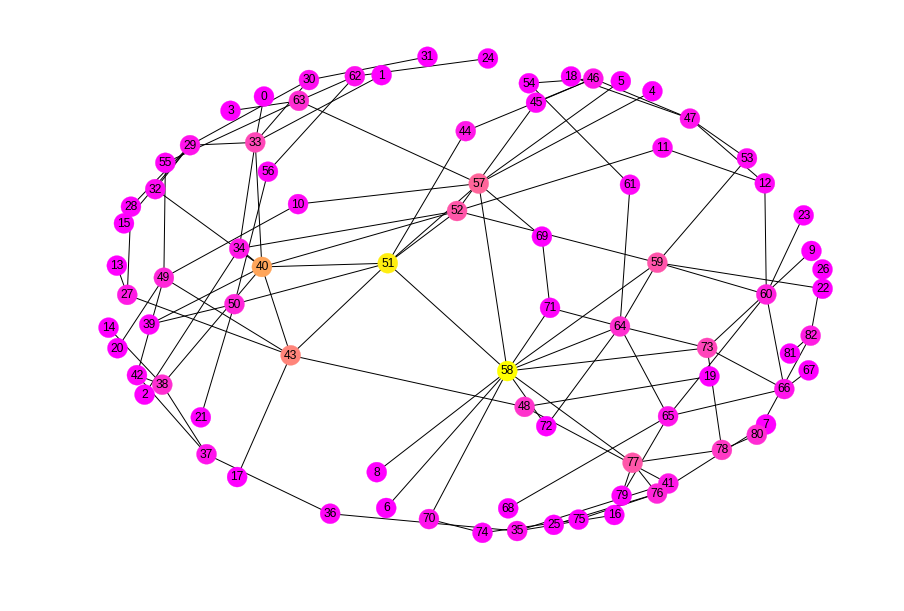

0.04296862245730891


In [17]:
from scipy.linalg import eig

# c_e = list(nx.eigenvector_centrality(P).values())
# c_d = list(nx.degree_centrality(P).values())
c_b = list(nx.betweenness_centrality(P).values())
# c_c = list(nx.closeness_centrality(P).values())

# c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]
print(max(c_b)-min(c_b))
nx.draw(P, pos=pr_pos, node_size=400, node_color=c_b, with_labels=True, font_color='k', cmap=plt.cm.spring)
plt.savefig('pr_bw.png')
plt.show()
print(sum(c_b)/len(c_b))

In [100]:
plt.savefig('pr_bw.png')

0.3404245525293402


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

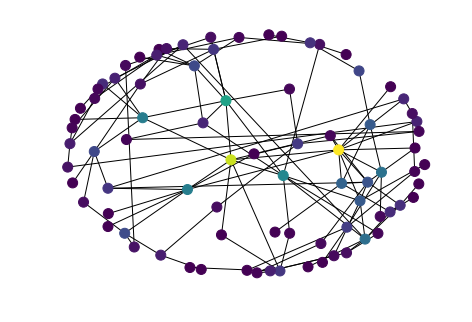

In [23]:
R = mutate_graph(P, 10)
c_b = list(nx.betweenness_centrality(R).values())
print(max(c_b) - min(c_b))

nx.draw(R, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

In [24]:
# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_e, cmap=plt.cm.viridis)
# plt.show()

# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_c, cmap=plt.cm.viridis)
# plt.show()

# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_ratio, cmap=plt.cm.viridis)
# plt.show()

# Import and Initialize GA

In [25]:
%run 'General_Genetic_Search.ipynb'

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0]


In [26]:
def pr_fitness_func(genome):
    # Convert genome to graph
    G = adj_list_to_graph(genome)
    # Calculate betweenness
    c_b = list(nx.betweenness_centrality(G).values())
    
    b_dist = max(c_b) - min(c_b)
    cost = new_cost(genome, graph_to_adj_list(P))
    
    return b_dist + cost/100


# Mean of c_b with vs without outliers

In [107]:
pr_fitness_func(graph_to_adj_list(P))

0.4205273798769734

In [108]:
import pickle

def run_GA(count):

    # Generate starting networks
    genomes = [graph_to_adj_list(mutate_graph(P, 1)) for i in range(100)]

    params = {
        'num_agents': 50,
        'fitness_function': pr_fitness_func,
        'gene_list': genomes,
        'constraints': None,
        'p_mut': .0005,
        'p_cross': .7,
        'repr_rate': 10,
        'max_iters': 100,
        'stop_tol': 10**(-8),
        'stop_tol_iters': 15
    }

    G = GeneticSearch(params)
    G.run()
    
    file = open('GS_results/run_' + str(count) + '.obj', 'wb')
    pickle.dump(G.Population.curr_elite.gene, file, pickle.HIGHEST_PROTOCOL)

In [109]:
count = 0

for i in range(100):
    print(count)
    run_GA(count)
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [104]:
file = open('pr_pos.obj', 'wb')
pickle.dump(pr_pos, file, pickle.HIGHEST_PROTOCOL)

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

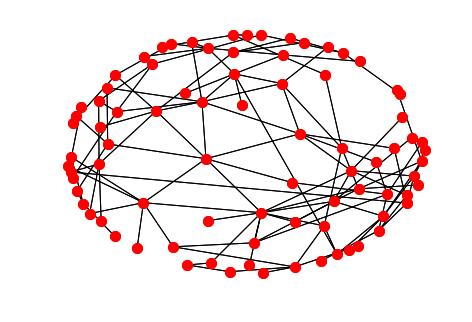

In [60]:
nx.draw(adj_list_to_graph(F), pos=pr_pos, node_size=100)
plt.show()

In [ ]:
[new_cost(agent.gene, graph_to_adj_list(P)) for agent in G.Population.agents]

In [71]:
E = adj_list_to_graph(G.Population.curr_elite.gene)
G.Population.curr_elite.fit

0.362856608412164

0.362856608412164


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

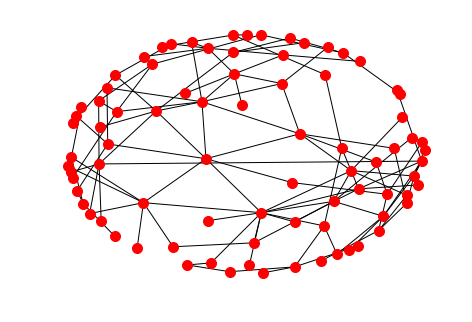

In [72]:
print(G.Population.curr_elite.fit)
nx.draw(E, pos=pr_pos, node_size=100)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

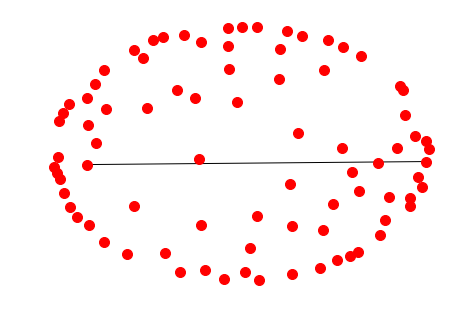

In [73]:
plot_diff(E, P)

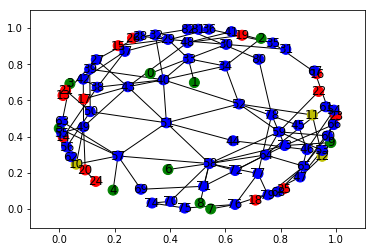

In [74]:
nx.draw_networkx(P, pos=pr_pos, node_size=100, node_color=pr_colors)
plt.show()

In [ ]:
def pr_fitness_func(genome):
    G = adj_list_to_graph(genome)
    c_b = list(nx.betweenness_centrality(G).values())
    
    b_dist = max(c_b) - min(c_b)
    cost = new_cost(genome, graph_to_adj_list(P))
    
    return b_dist + cost/75

genomes = [graph_to_adj_list(mutate_graph(P, 1)) for i in range(100)]
params = {
    'num_agents': 50,
    'fitness_function': pr_fitness_func,
    'gene_list': genomes,
    'constraints': None,
    'p_mut': .0005,
    'p_cross': .7,
    'repr_rate': 10,
    'max_iters': 100,
    'stop_tol': 10**(-8),
    'stop_tol_iters': 30
}

G = GeneticSearch(params)
G.run()
E = adj_list_to_graph(G.Population.curr_elite.gene)
plot_diff(E, P)

0.28343525807392106
0.28343525807392106


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

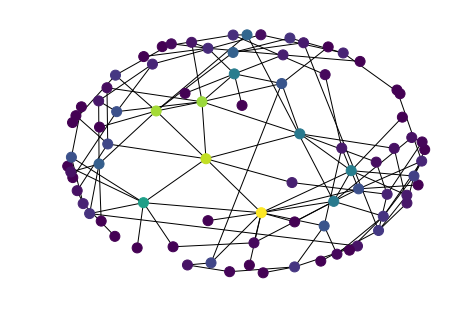

In [76]:
c_b = list(nx.betweenness_centrality(E).values())
print(max(c_b) - min(c_b))
print(max(c_b))
nx.draw(E, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

In [100]:
file = open('GS_results/run_0.obj', 'rb')
gene = pickle.load(file)
new_cost(gene, graph_to_adj_list(P))

4.0

In [101]:
file = open('GS_results/run_1.obj', 'rb')
gene = pickle.load(file)
new_cost(gene, graph_to_adj_list(P))

4.0

## Analyze Results

In [7]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

results = []
for i in range(100):
    file = open('GS_results/run_' + str(i) + '.obj', 'rb')
    gene = pickle.load(file)
    results.append(gene)
    
len(results)

100

In [8]:
# Dictionary that contains:
# betweenness centrality diff of graph
# number of changes
# list of single nodes that were connected 
# list of pairs of nodes that were connected
# path length between the pairs of nodes that were connected

In [9]:
p_list = graph_to_adj_list(P)
p_avg_path = nx.average_shortest_path_length(P)
full_results = []

for result in results:
    results_dict = {}
    
    bc_list = nx.betweenness_centrality(adj_list_to_graph(result)).values()
    results_dict['bc'] = max(bc_list) - min(bc_list)
    
    results_dict['cost'] = new_cost(p_list, result)
    
    J = adj_matrix_to_graph(np.bitwise_xor(adj_list_to_matrix(result), graph_to_adj_matrix(P)))
    j_edges = J.edges()
    node_set = set()
    [node_set.add(node) for pair in j_edges for node in pair]
    results_dict['nodes'] = list(node_set)
    results_dict['node_pairs'] = j_edges
    
    R = adj_list_to_graph(results[0])
    shortest_paths = [nx.shortest_path_length(P, source=pair[0], target=pair[1]) for pair in j_edges]
    results_dict['avg_path_ratio'] = sum(shortest_paths)/(len(shortest_paths)*p_avg_path)
    
    full_results.append(results_dict)


### Cost vs Betweenness Difference

Populating the interactive namespace from numpy and matplotlib


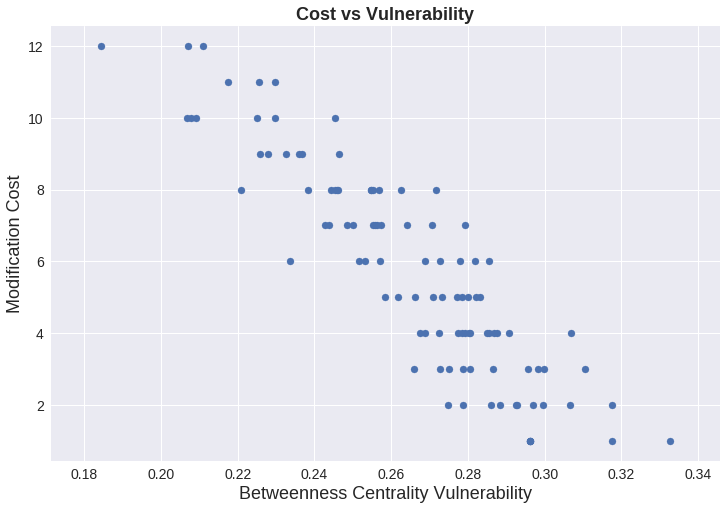

In [11]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

plt.scatter([result['bc'] for result in full_results], [result['cost'] for result in full_results])
plt.title('Cost vs Vulnerability', fontsize=18, fontweight='bold')
plt.xlabel('Betweenness Centrality Vulnerability', fontsize=18)
plt.ylabel('Modification Cost', fontsize=18)
plt.savefig('cost_vcr.png')
plt.show()

### Most Common Nodes

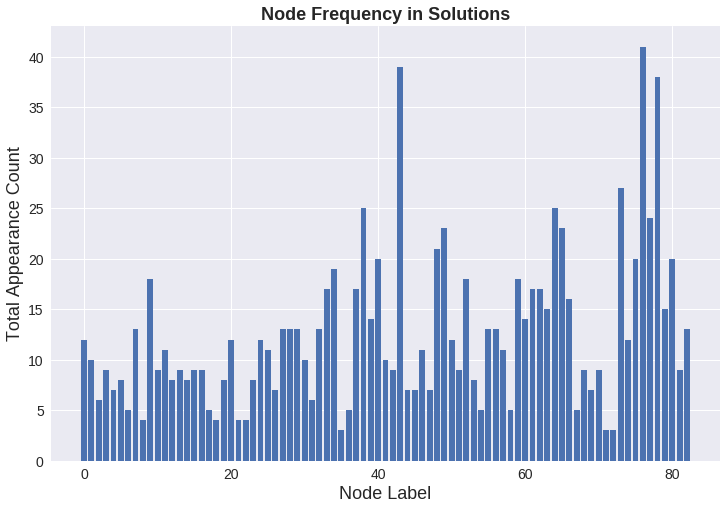

65: 23
64: 25
38: 25
76: 41
77: 24
48: 21
49: 23
80: 20
34: 19
33: 17
66: 16
73: 27
78: 38
9: 18
43: 39
62: 17
37: 17
61: 17
40: 20
75: 20
52: 18
59: 18
Average count: 12.602409638554217


In [26]:
node_freq = {}

for result in full_results:
    for node in result['nodes']:
        if node in node_freq:
            node_freq[node] += 1
        else:
            node_freq[node] = 1
        
plt.bar(list(node_freq.keys()), list(node_freq.values()))
plt.title('Node Frequency in Solutions', fontsize=18, fontweight='bold')
plt.xlabel('Node Label', fontsize=18)
plt.ylabel('Total Appearance Count', fontsize=18)
plt.savefig('node_count.png')
plt.show()

for node, count in node_freq.items():
    if count > 15:
        print(str(node) + ': ' + str(count))
        
print('Average count: ' + str(sum(list(node_freq.values()))/len(node_freq.keys())))

### Most Common Node Pairs

In [18]:
node_pair_freq = {}

for result in full_results:
    for pair in result['node_pairs']:
        if pair in node_pair_freq:
            node_pair_freq[pair] += 1
        else:
            node_pair_freq[pair] = 1
    
j = 0
for pair, count in node_pair_freq.items():
    if count > 2:
        print(str(pair) + ': ' + str(count))
        j += 1

print('Displaying ' + str(j) + '/' + str(len(node_pair_freq.keys())))
print(sum(list(node_pair_freq.values()))/len(node_pair_freq.keys()))
        

(48, 76): 5
(39, 78): 4
(43, 77): 4
(43, 78): 9
(43, 65): 4
(52, 76): 8
(43, 73): 3
(40, 76): 4
(43, 64): 7
(52, 77): 3
(38, 61): 3
(40, 64): 3
(63, 65): 4
(49, 78): 3
(57, 76): 4
(43, 79): 3
(48, 78): 3
Displaying 17/467
1.2248394004282654


### Average Path Ratio vs Betweenness Difference

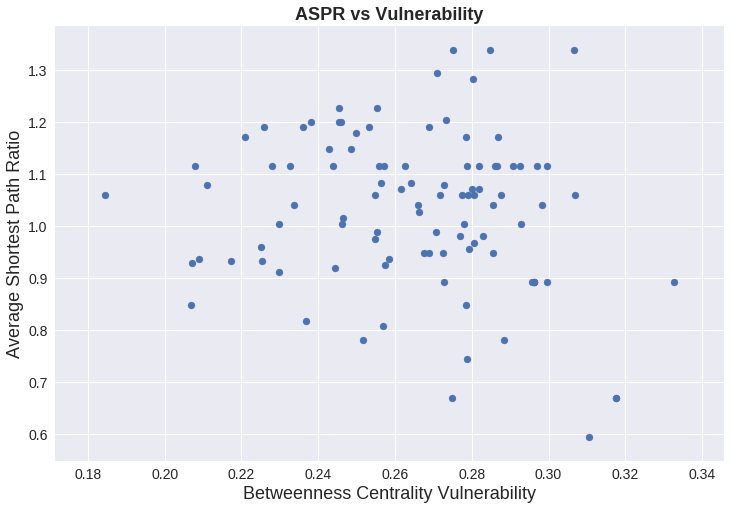

In [14]:
plt.scatter([result['bc'] for result in full_results], [result['avg_path_ratio'] for result in full_results])
plt.title('ASPR vs Vulnerability', fontsize=18, fontweight='bold')
plt.xlabel('Betweenness Centrality Vulnerability', fontsize=18)
plt.ylabel('Average Shortest Path Ratio', fontsize=18)
plt.savefig('aspr_vcr.png')
plt.show()

In [35]:
print('Shortest Path Ratio for most common node pairs')
print('\r')
print('43--78:', nx.shortest_path_length(P, source=43, target=78)/p_avg_path)
print('52--76:', nx.shortest_path_length(P, source=52, target=76)/p_avg_path)
print('43--64:', nx.shortest_path_length(P, source=43, target=64)/p_avg_path)
print('48--76:', nx.shortest_path_length(P, source=48, target=76)/p_avg_path)

spr_list = [nx.shortest_path_length(P, source=pair[0], target=pair[1])/p_avg_path for pair in node_pair_freq.keys()]
print(min(spr_list))

b_c_d = [abs(c_b[int(pair[0])]-c_b[int(pair[1])]) for pair in node_pair_freq.keys()]
print(max(b_c_d))

Shortest Path Ratio for most common node pairs

43--78: 0.8927657899914737
52--76: 0.8927657899914737
43--64: 0.6695743424936053
48--76: 1.115957237489342
0.22319144749786843
0.41142871481624876


### Centrality Metrics

In [132]:
c_e = list(nx.eigenvector_centrality(P).values())
c_d = list(nx.degree_centrality(P).values())
c_b = list(nx.betweenness_centrality(P).values())
c_c = list(nx.closeness_centrality(P).values())
c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]

In [150]:
print('Degree centrality:')
print(' Avg: ' + str(sum(c_d)/len(c_d)))
print(' Std: ' + str(np.std(c_d)))
print('  76: ' + str(c_d[76]))
print('  78: ' + str(c_d[78]))
print('  43: ' + str(c_d[43]))
print('  64: ' + str(c_d[64]))
print('  48: ' + str(c_d[48]))
print('  52: ' + str(c_d[52]))

Degree centrality:
 Avg: 0.03349985307081989
 Std: 0.024305124280637337
  76: 0.04878048780487805
  78: 0.03658536585365854
  43: 0.07317073170731708
  64: 0.08536585365853659
  48: 0.03658536585365854
  52: 0.07317073170731708


In [147]:
print('Eigenvector centrality:')
print(' Avg: ' + str(sum(c_e)/len(c_e)))
print(' Std: ' + str(np.std(c_e)))
print('  76: ' + str(c_e[76]))
print('  78: ' + str(c_e[78]))
print('  43: ' + str(c_e[43]))
print('  64: ' + str(c_e[64]))
print('  48: ' + str(c_e[48]))
print('  52: ' + str(c_e[52]))

Eigenvector centrality:
 Avg: 0.07116962592313526
 std: 0.0835648078861271
  76: 0.034157631070107025
  78: 0.07770293596104248
  43: 0.15618047357326054
  64: 0.3179182713998374
  48: 0.03686100676968796
  52: 0.22888380711103273


In [27]:
print('Closeness centrality:')
print(' Avg: ' + str(sum(c_c)/len(c_c)))
print(' Std: ' + str(np.std(c_c)))
print('  76: ' + str(c_c['76']))
print('  78: ' + str(c_c[78]))
print('  43: ' + str(c_c[43]))
print('  64: ' + str(c_c[64]))
print('  48: ' + str(c_c[48]))
print('  52: ' + str(c_c[52]))

Closeness centrality:


NameError: name 'c_c' is not defined

In [30]:
print('Betweenness centrality:')
print(' Avg: ' + str(sum(c_b)/len(c_b)))
print(' Std: ' + str(np.std(c_b)))
print('  76: ' + str(c_b[76]))
print('  78: ' + str(c_b[78]))
print('  43: ' + str(c_b[43]))
print('  64: ' + str(c_b[64]))
print('  48: ' + str(c_b[48]))
print('  52: ' + str(c_b[52]))

Betweenness centrality:
 Avg: 0.04296862245730891
 Std: 0.07660970423751726
  76: 0.06263173742848538
  78: 0.09645689049483089
  43: 0.21883970691558763
  64: 0.07858935203108645
  48: 0.08429187995583658
  52: 0.14163515396577736


In [ ]:
nx.draw_networkx(P, pos=pr_pos, node_size=100, node_color=pr_colors)
plt.show()

In [ ]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_d, cmap=plt.cm.viridis)
plt.show()

In [ ]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_e, cmap=plt.cm.viridis)
plt.show()

In [ ]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_ratio, cmap=plt.cm.viridis)
plt.show()

In [ ]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_c, cmap=plt.cm.viridis)
plt.show()

In [ ]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()